In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# google sheet: https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0    

#Note: Data has been filtered/changed a bit from orginal form to demonstrate null and outlier handling.


sheet_url = 'https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

In [3]:
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     3087 non-null   object 
 6   Gender        7575 non-null   object 
 7   YearsCode     8132 non-null   object 
 8   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 573.3+ KB


### Explore factors influencing Compensation 

Target = Compensation



### How to handle nulls and Outliers

### How do I handle missing data (nulls) in my dataset?

- Drop the nulls
    - drop columns
    - drop rows
- Impute missing values
    - fillna with mean, median, mode of the column
    - Impute using some other algorithms - KNN imputer
- Use algorithms which can handle nulls
    - Ignores missing values
- Boolean flags for missing data

In [5]:
# How many nulls have in each column?

df.isnull().sum()

Respondent         0
Hobbyist           0
Age              923
Age1stCode        16
Comp               0
Ethnicity       5065
Gender           577
YearsCode         20
YearsCodePro      16
dtype: int64

In [6]:
# % values missing in each column

df.isnull().sum()/len(df)*100

Respondent      0.00
Hobbyist        0.00
Age            11.32
Age1stCode      0.20
Comp            0.00
Ethnicity      62.13
Gender          7.08
YearsCode       0.25
YearsCodePro    0.20
dtype: float64

In [7]:
# How many nulls have in each row?
df.isnull().sum(axis=1)


0       0
1       0
2       0
3       0
4       0
       ..
8147    3
8148    3
8149    3
8150    3
8151    1
Length: 8152, dtype: int64

In [ ]:
# Drop columns or rows using dropna() based on a threshold

In [10]:
len(df.index)*.5
#I need at least this many non nulls to keep the column. 


4076.0

In [11]:
# Drop rows using dropna() based on a threshold

# threshold: Require that many non-NA values to survive. 

df.dropna(axis = 1, thresh = 0.5 * len(df.index))

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3
...,...,...,...,...,...,...,...,...
8147,65589,Yes,nan,16,150000,NaN,10,6
8148,65596,Yes,nan,22,70000,NaN,6,4
8149,65602,Yes,nan,13,140000,NaN,15,12
8150,65604,No,nan,13,150000,NaN,7,4


In [13]:
# Drop rows using dropna() based on a threshold


# threshold: only drop when # of nulls in a row is above the threshold value

df.dropna(axis = 0, thresh = 0.5 * len(df.columns))

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3
...,...,...,...,...,...,...,...,...,...
8147,65589,Yes,nan,16,150000,NaN,NaN,10,6
8148,65596,Yes,nan,22,70000,NaN,NaN,6,4
8149,65602,Yes,nan,13,140000,NaN,NaN,15,12
8150,65604,No,nan,13,150000,NaN,NaN,7,4


In [14]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' funtcion which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [15]:
# use the function on our dataset
df = handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5)
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8151 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8151 non-null   int64  
 1   Hobbyist      8151 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8151 non-null   int64  
 5   Gender        7575 non-null   object 
 6   YearsCode     8132 non-null   object 
 7   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 573.1+ KB


In [17]:
df.isnull().sum()

Respondent        0
Hobbyist          0
Age             922
Age1stCode       15
Comp              0
Gender          576
YearsCode        19
YearsCodePro     15
dtype: int64

In [19]:
# drop null rows for specific columns only

df = df[df.YearsCode.notnull()]
df = df[df.YearsCodePro.notnull()]
df = df[df.Age1stCode.notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   object 
 4   Comp          8108 non-null   int64  
 5   Gender        7534 non-null   object 
 6   YearsCode     8108 non-null   object 
 7   YearsCodePro  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 570.1+ KB


In [20]:
df.isnull().sum()

Respondent        0
Hobbyist          0
Age             914
Age1stCode        0
Comp              0
Gender          574
YearsCode         0
YearsCodePro      0
dtype: int64

In [21]:
# what is the most common/frequent observation in Gender in train dataset?
df.Gender.value_counts()/len(df)*100

Man                                                           81.77
Woman                                                          9.20
Non-binary, genderqueer, or gender non-conforming              1.18
Man;Non-binary, genderqueer, or gender non-conforming          0.37
Woman;Non-binary, genderqueer, or gender non-conforming        0.33
Woman;Man                                                      0.04
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.02
Name: Gender, dtype: float64

In [23]:
# Fill NaNs with mode
df.Gender.mode()[0]

df.Gender.fillna(df.Gender.mode()[0])



0       Man
1       Man
2       Man
3       Man
4       Man
       ... 
8147    Man
8148    Man
8149    Man
8150    Man
8151    Man
Name: Gender, Length: 8108, dtype: object

In [26]:
# Use skearn simple imputer

from sklearn.impute import SimpleImputer

#defining the imputer object
imp_mode = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')

df1 = pd.DataFrame(imp_mode.fit_transform(df[['Gender']]), columns = ['Gender_imputed'], index=df.index)
# fit and transform on train only!!
#df1 = pd.DataFrame(imp_mode.fit_transform(df[['Gender']]), columns = ['Gender_imputed'], index = df.index)

In [32]:
#merge transformed column(s) with original dataframe
df = pd.merge(df, df1, right_index=True, left_index=True).drop(columns = ['Gender'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             7194 non-null   float64
 3   Age1stCode      8108 non-null   object 
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   object 
 6   YearsCodePro    8108 non-null   object 
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 890.1+ KB


In [31]:
df.isnull().sum()

Respondent        0
Hobbyist          0
Age             914
Age1stCode        0
Comp              0
Gender          574
YearsCode         0
YearsCodePro      0
dtype: int64

In [34]:
df.YearsCode.value_counts()

10                    632
20                    485
6                     424
8                     420
7                     410
5                     390
15                    381
12                    353
25                    299
9                     278
4                     256
11                    232
14                    230
13                    219
16                    219
30                    213
3                     211
18                    195
17                    186
22                    168
40                    160
35                    137
23                    136
21                    125
2                     122
19                    118
24                    111
26                     95
38                     85
27                     72
28                     67
37                     65
36                     58
32                     57
34                     55
29                     45
42                     44
1                      42
33          

In [35]:
df.YearsCodePro.value_counts()

3                     727
5                     672
2                     667
4                     562
10                    464
6                     459
7                     406
1                     385
8                     374
20                    324
Less than 1 year      316
15                    299
12                    266
9                     201
13                    180
11                    178
14                    151
25                    150
16                    148
22                    110
18                     97
21                     93
30                     87
19                     83
23                     83
17                     72
24                     71
26                     50
27                     49
35                     44
28                     40
40                     37
38                     31
34                     26
31                     24
32                     24
33                     23
29                     22
36          

In [36]:
df.Age1stCode.value_counts()

12                      889
13                      710
15                      689
14                      675
10                      656
16                      650
18                      602
11                      387
17                      383
8                       351
19                      324
9                       235
20                      215
7                       182
21                      142
25                      117
22                      114
6                       105
23                       99
24                       89
26                       75
5                        57
27                       56
Younger than 5 years     55
30                       53
28                       45
29                       32
31                       25
35                       19
33                       18
32                       12
34                        8
36                        6
40                        6
39                        6
41                  

In [37]:
df.replace('Younger than 5 years', 4, inplace=True)
df.replace('Older than 85', 85, inplace=True)
df.replace('More than 50 years', 50, inplace=True)
df.replace('Less than 1 year', 0, inplace=True)

In [38]:
df['Age1stCode'] = df.Age1stCode.astype('int64')
df['YearsCode'] = df.YearsCode.astype('int64')
df['YearsCodePro'] = df.YearsCodePro.astype('int64')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             7194 non-null   float64
 3   Age1stCode      8108 non-null   int64  
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   int64  
 6   YearsCodePro    8108 non-null   int64  
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 890.1+ KB


In [40]:
from sklearn.impute import KNNImputer

#Use numeric columns that you want to use for imputation
X_numeric = df[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']]

# define the thing
imputer = KNNImputer(n_neighbors=1)


# fit the thing (or fit and use with fit_transform) only on train!
imputed = imputer.fit_transform(X_numeric)
imputed

array([[36., 12., 17., 13.],
       [27., 13.,  5.,  1.],
       [25., 14.,  7.,  3.],
       ...,
       [28., 13., 15., 12.],
       [26., 13.,  7.,  4.],
       [41., 15., 25., 20.]])

In [42]:
pd.DataFrame(imputed).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [44]:
imputed = pd.DataFrame(imputed, index=df.index)
imputed.head()

,0,1,2,3
0,36.00,12.00,17.00,13.00
1,27.00,13.00,5.00,1.00
2,25.00,14.00,7.00,3.00
3,32.00,12.00,19.00,12.00
4,24.00,15.00,9.00,3.00


In [45]:
df['Age'] = imputed[[0]]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             8108 non-null   float64
 3   Age1stCode      8108 non-null   int64  
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   int64  
 6   YearsCodePro    8108 non-null   int64  
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 890.1+ KB


### Outliers
- Data point(s) that differs significantly from other observations
- Could be due to chance, measurement errors, transcription error, sampling error/bias,

Question to ask:
- Is the outlier part of population that I want to explore/model?

Text(0.5, 1.0, 'Compensation')

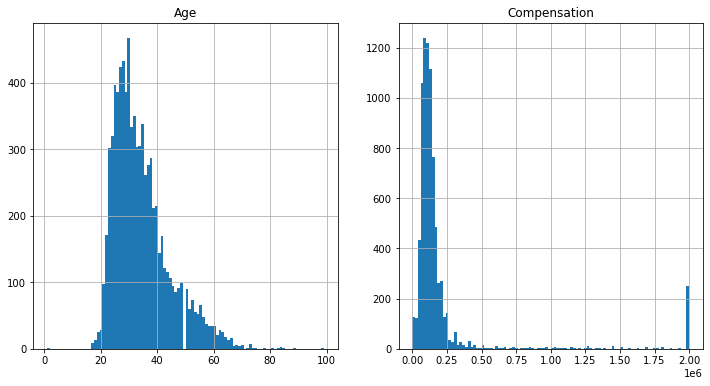

In [47]:
# plot histograms from Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
df.Age.hist(bins = 100)
plt.title('Age')

plt.subplot(122)
df.Comp.hist(bins = 100)
plt.title('Compensation')

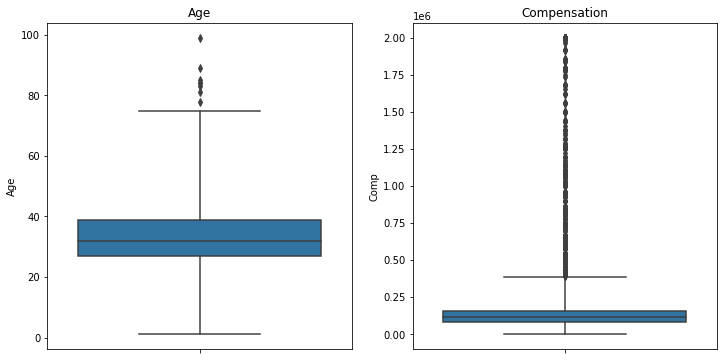

In [48]:
# Boxplot for Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = 'Age', data = df, whis = 3)
plt.title('Age')

plt.subplot(122)
plt.title('Compensation')
sns.boxplot(y = 'Comp', data = df, whis = 3);

### Handling Outliers:
- Use domain knowledge/business rules to have cut-offs
- Use IQR method to exclude outliers
- Cap/Trim max value 
- transformation
- Impute new value (if you know outlier is a mistake)

In [49]:
# Calculate q1, q3 and iqr for Age
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
iqr = q3 - q1
k = 3

# calculate upper and lower ranges
upper_bound_Age =  q3 + k * iqr
lower_bound_Age =  q1 - k * iqr

In [52]:
upper_bound_Age, lower_bound_Age

(75.0, -9.0)

In [53]:
# Calculate q1, q3 and iqr for Comp
q1 = df.Comp.quantile(0.25)
q3 = df.Comp.quantile(0.75)
iqr = q3 - q1
k = 3


# calculate upper and lower ranges
upper_bound_Comp = q3 + k * iqr
lower_bound_Comp = q1 - k * iqr

In [54]:
upper_bound_Comp, lower_bound_Comp

(391000.0, -148000.0)

In [56]:
# Filter dataframe using multiple conditions

df[(df.Age < upper_bound_Age) & (df.Comp < upper_bound_Comp)]

,Respondent,Hobbyist,Age,Age1stCode,Comp,YearsCode,YearsCodePro,Gender_imputed
0,8,Yes,36.00,12,116000,17,13,Man
1,14,Yes,27.00,13,66000,5,1,Man
2,17,Yes,25.00,14,79000,7,3,Man
4,19,No,24.00,15,83400,9,3,Man
5,41,No,41.00,15,106000,25,20,Man
...,...,...,...,...,...,...,...,...
8147,65589,Yes,26.00,16,150000,10,6,Man
8148,65596,Yes,27.00,22,70000,6,4,Man
8149,65602,Yes,28.00,13,140000,15,12,Man
8150,65604,No,26.00,13,150000,7,4,Man


In [57]:
# Cap the limit

# df['column'] = np.where(this_is_true, do_this, else_do_that)

df.Comp = np.where(df.Comp > 1_000_000, df.Comp == 1_000_000, df.Comp)